/tmp/ipykernel_1954734/3051072851.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(np.arange(0, 5), fontsize=36)


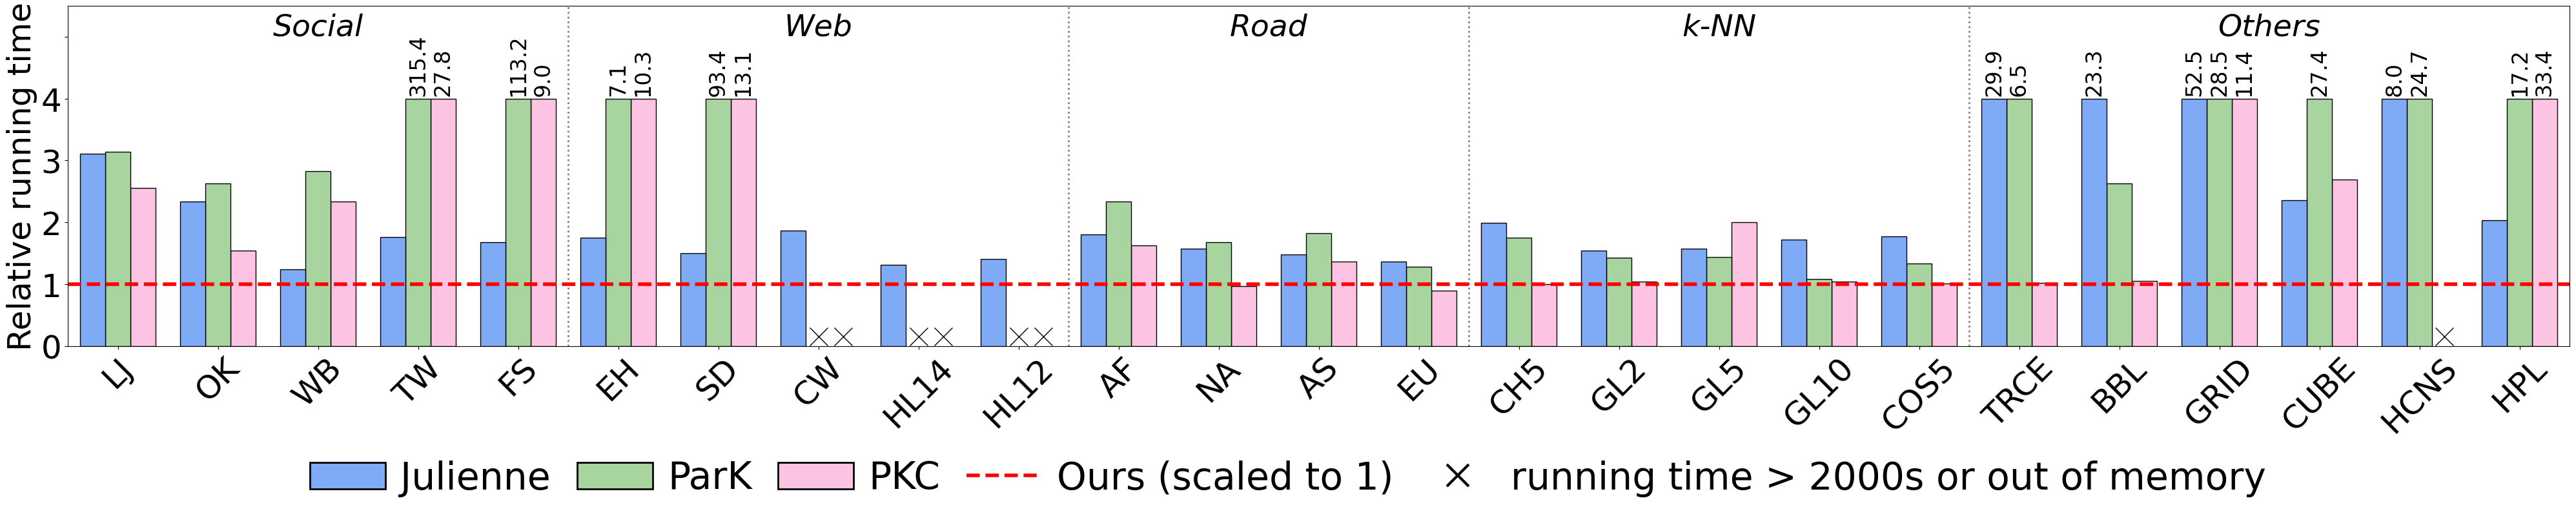

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle

from matplotlib.lines import Line2D

file_path = './../data/speedup.csv'
data = pd.read_csv(file_path, keep_default_na=False)
data.columns = data.columns.str.strip()

data['speedup over PKC'] = pd.to_numeric(data['speedup over PKC'], errors='coerce')
data['speedup over GBBS'] = pd.to_numeric(data['speedup over GBBS'], errors='coerce')
data['speedup over ParK'] = pd.to_numeric(data['speedup over ParK'], errors='coerce')
data['ours'] = pd.to_numeric(data['Ours'], errors='coerce')

categories = data['Category'].unique()

palette = ["#FCC4E2", "#A8D59F", "#7EAAF6"]

fig, ax = plt.subplots(figsize=(40, 7))  # Single figure

def plot_bars(ax, data_subset):
    index = 0
    bar_width = 0.25
    category_positions = []
    
    ax.set_ylim([0, 5.5])  # Adjust the y-limit as needed
    subset_categories = data_subset['Category'].unique()
    
    for category in subset_categories:
        subset = data_subset[data_subset['Category'] == category]
        category_index = np.arange(len(subset)) + index

        limited_pkc = subset['speedup over PKC'].apply(lambda x: min(x, 4) if pd.notna(x) else x)
        limited_gbbs = subset['speedup over GBBS'].apply(lambda x: min(x, 4) if pd.notna(x) else x)
        limited_park = subset['speedup over ParK'].apply(lambda x: min(x, 4) if pd.notna(x) else x)

        bars1 = ax.bar(category_index + bar_width, limited_pkc, bar_width, label='Speedup over PKC', color=palette[0], edgecolor='black')
        bars2 = ax.bar(category_index, limited_park, bar_width, label='Speedup over ParK', color=palette[1], edgecolor='black')
        bars3 = ax.bar(category_index - bar_width, limited_gbbs, bar_width, label='Speedup over GBBS', color=palette[2], edgecolor='black')

        for i, (bar1, bar2, bar3) in enumerate(zip(bars1, bars2, bars3)):
            pkc_value = subset.iloc[i]['speedup over PKC']
            park_value = subset.iloc[i]['speedup over ParK']
            gbbs_value = subset.iloc[i]['speedup over GBBS']

            if pd.isna(pkc_value):
                ax.plot(bar1.get_x() + bar1.get_width() / 2, 0.15, 'kx', markersize=20, label='_nolegend_')
            elif pkc_value > 4:
                ax.text(bar1.get_x() + bar1.get_width() / 2, 4.05, f'{pkc_value:.1f}', ha='center', va='bottom', fontsize=24, color='black', rotation=90)

            if pd.isna(park_value):
                ax.plot(bar2.get_x() + bar2.get_width() / 2, 0.15, 'kx', markersize=20, label='_nolegend_')
            elif park_value > 4:
                ax.text(bar2.get_x() + bar2.get_width() / 2, 4.05, f'{park_value:.1f}', ha='center', va='bottom', fontsize=24, color='black', rotation=90)

            if pd.isna(gbbs_value):
                ax.plot(bar3.get_x() + bar3.get_width() / 2, 0.15, 'kx', markersize=20, label='_nolegend_')
            elif gbbs_value > 4:
                ax.text(bar3.get_x() + bar3.get_width() / 2, 4.05, f'{gbbs_value:.1f}', ha='center', va='bottom', fontsize=24, color='black', rotation=90)

        category_start = category_index[0] - bar_width
        category_end = category_index[-1] + bar_width
        category_midpoint = (category_start + category_end) / 2
        category_positions.append((category_start, category_end, category_midpoint))

        index += len(subset)

    ax.set_xticks(np.arange(len(data_subset)))
    ax.set_xticklabels(data_subset['Graph'], rotation=45, fontsize=36)
    ax.set_yticklabels(np.arange(0, 5), fontsize=36)
    for i in range(len(category_positions) - 1):
        midpoint = (category_positions[i][1] + category_positions[i + 1][0]) / 2
        ax.axvline(x=midpoint, color='grey', linestyle=':', linewidth=2, label='_nolegend_')

    for position, category in zip(category_positions, subset_categories):
        ax.text(position[2], 0.98, category, ha='center', va='top', fontsize=34, 
                transform=ax.get_xaxis_transform(), fontstyle='italic')

    ax.set_xlim([min(np.arange(len(data_subset))) - bar_width * 2,
                 max(np.arange(len(data_subset))) + bar_width * 2])
    ax.set_ylabel('Relative running time', fontsize=36)

x_values = np.linspace(-0.5, len(data) - 0.5, len(data))  
limited_ours = data['ours'].apply(lambda x: min(x, 4) if pd.notna(x) else x)

plot_bars(ax, data)

ax.plot(x_values, limited_ours, linestyle='--', linewidth=4, color='red')

handles = [
    Rectangle((0, 0), 1, 1, facecolor=palette[2], edgecolor='black', linewidth=2, label='Julienne'),
    Rectangle((0, 0), 1, 1, facecolor=palette[1], edgecolor='black', linewidth=2, label='ParK'),
    Rectangle((0, 0), 1, 1, facecolor=palette[0], edgecolor='black', linewidth=2, label='PKC'),
    
    Line2D([0], [0], linestyle='--', linewidth=4, color='red', label='Ours (scaled to 1)'),
    Line2D([0], [0], marker='x', color='k', label='running time > 2000s or out of memory', markersize=24, linestyle='None', markeredgewidth=3)
]

# ax.set_title('Speedup Comparison over GBBS, PKC, and ParK', fontsize=46, pad=20)

fig.legend(
    handles=handles, 
    loc='upper center', 
    bbox_to_anchor=(0.5, 0.05),
    fontsize=42, 
    frameon=True,
    ncol=5, 
    handletextpad=0.4,  
    columnspacing=0.7,  
    borderpad=0.4,
    edgecolor='none',
)

fig.tight_layout()
fig.savefig('./overall_row.pdf', bbox_inches='tight')
plt.show()
